# 本影片適合的對象
- 想分析股市的人
- 想下載台股大盤或個股資料的人
- 想了解均線概念的人
- 想畫均線或K線的人
- 想了解黃金或死亡交叉的人

# 影片內容
## Part 1: 移動平均的概念
 - 1.1 簡單移動平均
 - 1.2 指數移動平均

## Part2: 計算與視覺化移動平均線
 - 2.1 大盤移動平均線
 - 2.2 個股移動平均線
 
## Part3: 移動平均應用
 - 3.1 黃金交叉
 - 3.2 死亡交叉

# Part 1: 移動平均的概念

## 1.1 簡單移動平均 (Simple Moving Average)
 一個簡單移動平均（SMA）是以前 n 個數據的未加權平均數

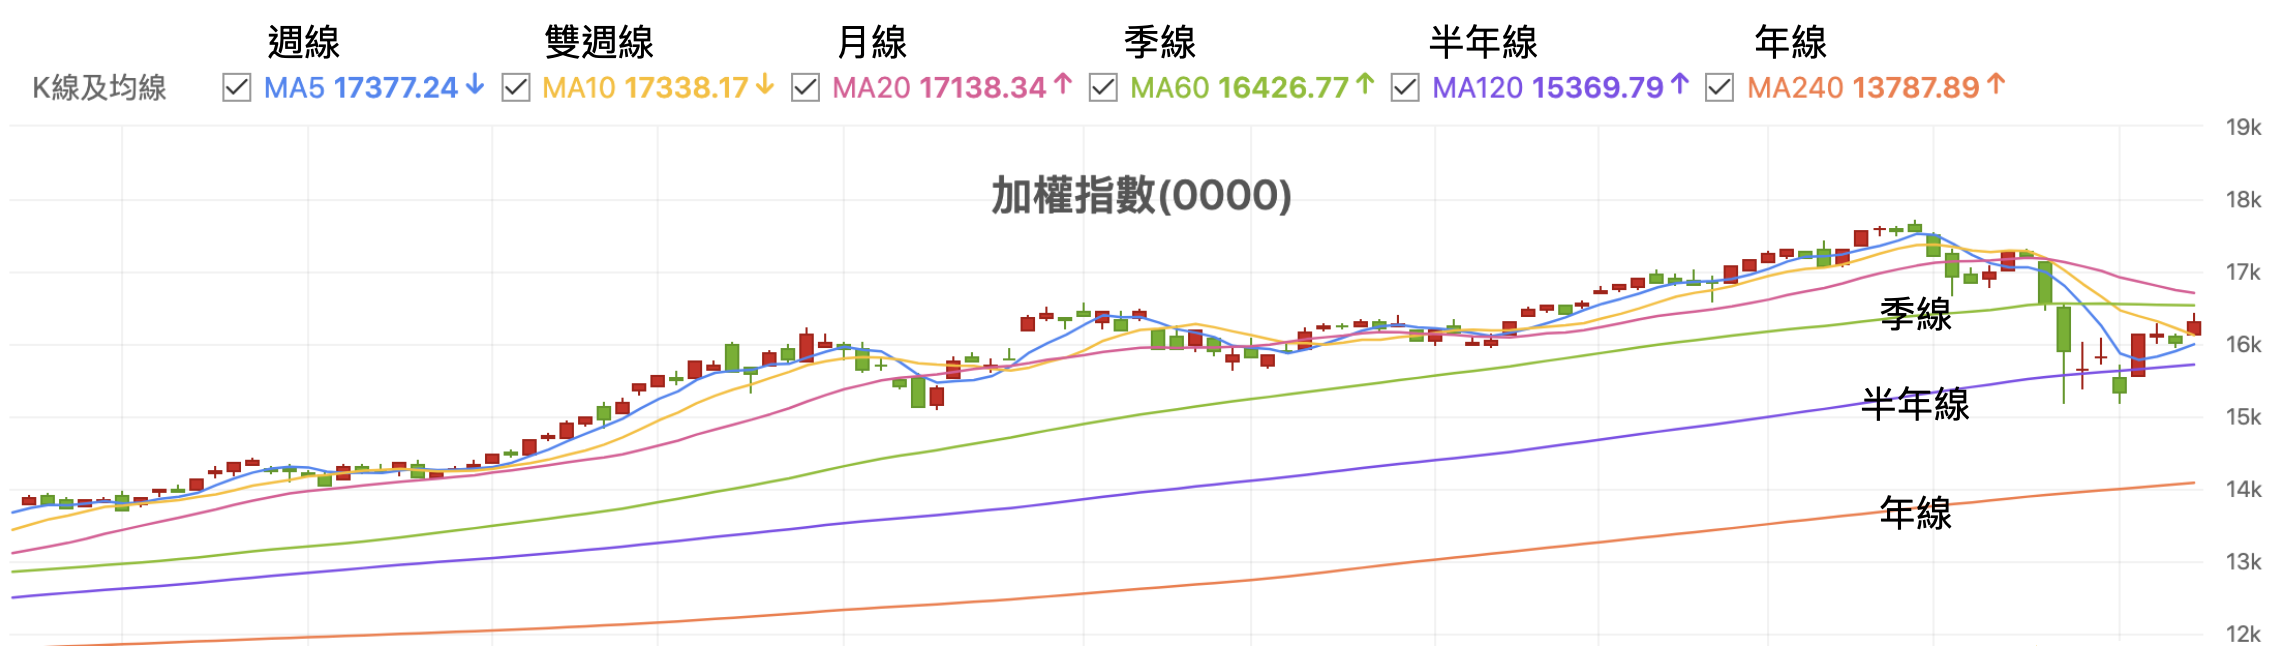

In [1]:
from IPython.display import Image
Image("img/MA_example.png")

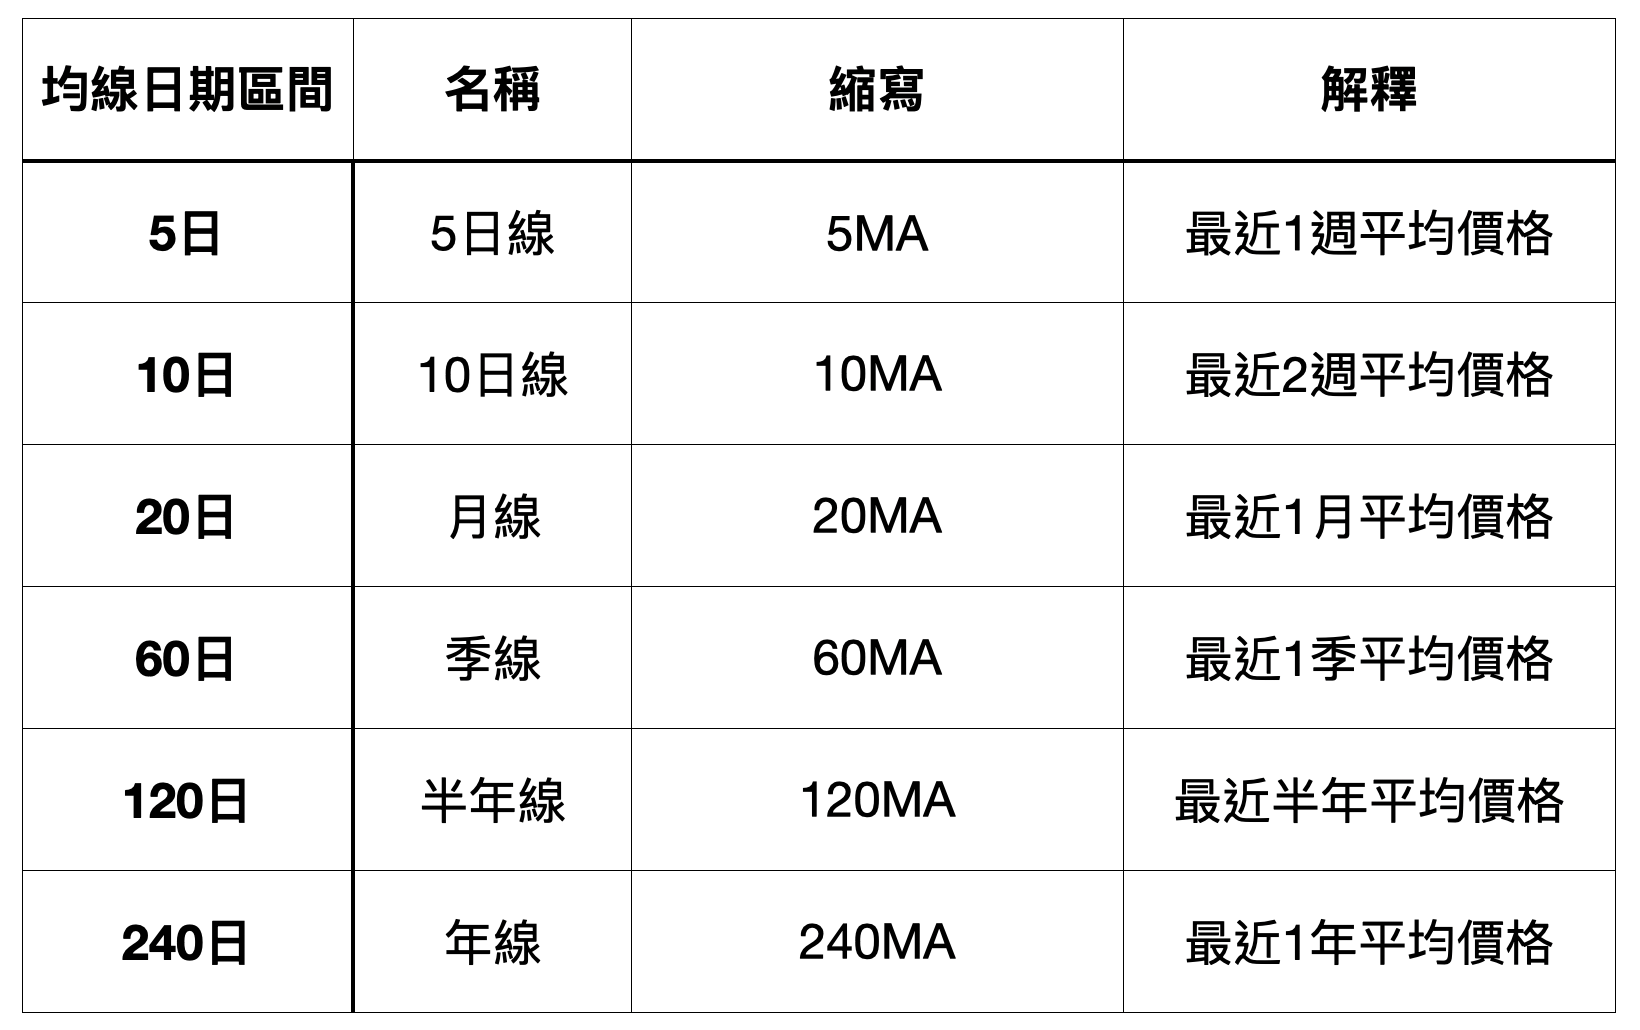

In [2]:
Image("img/MA_concept.png", width = 500, height = 400)

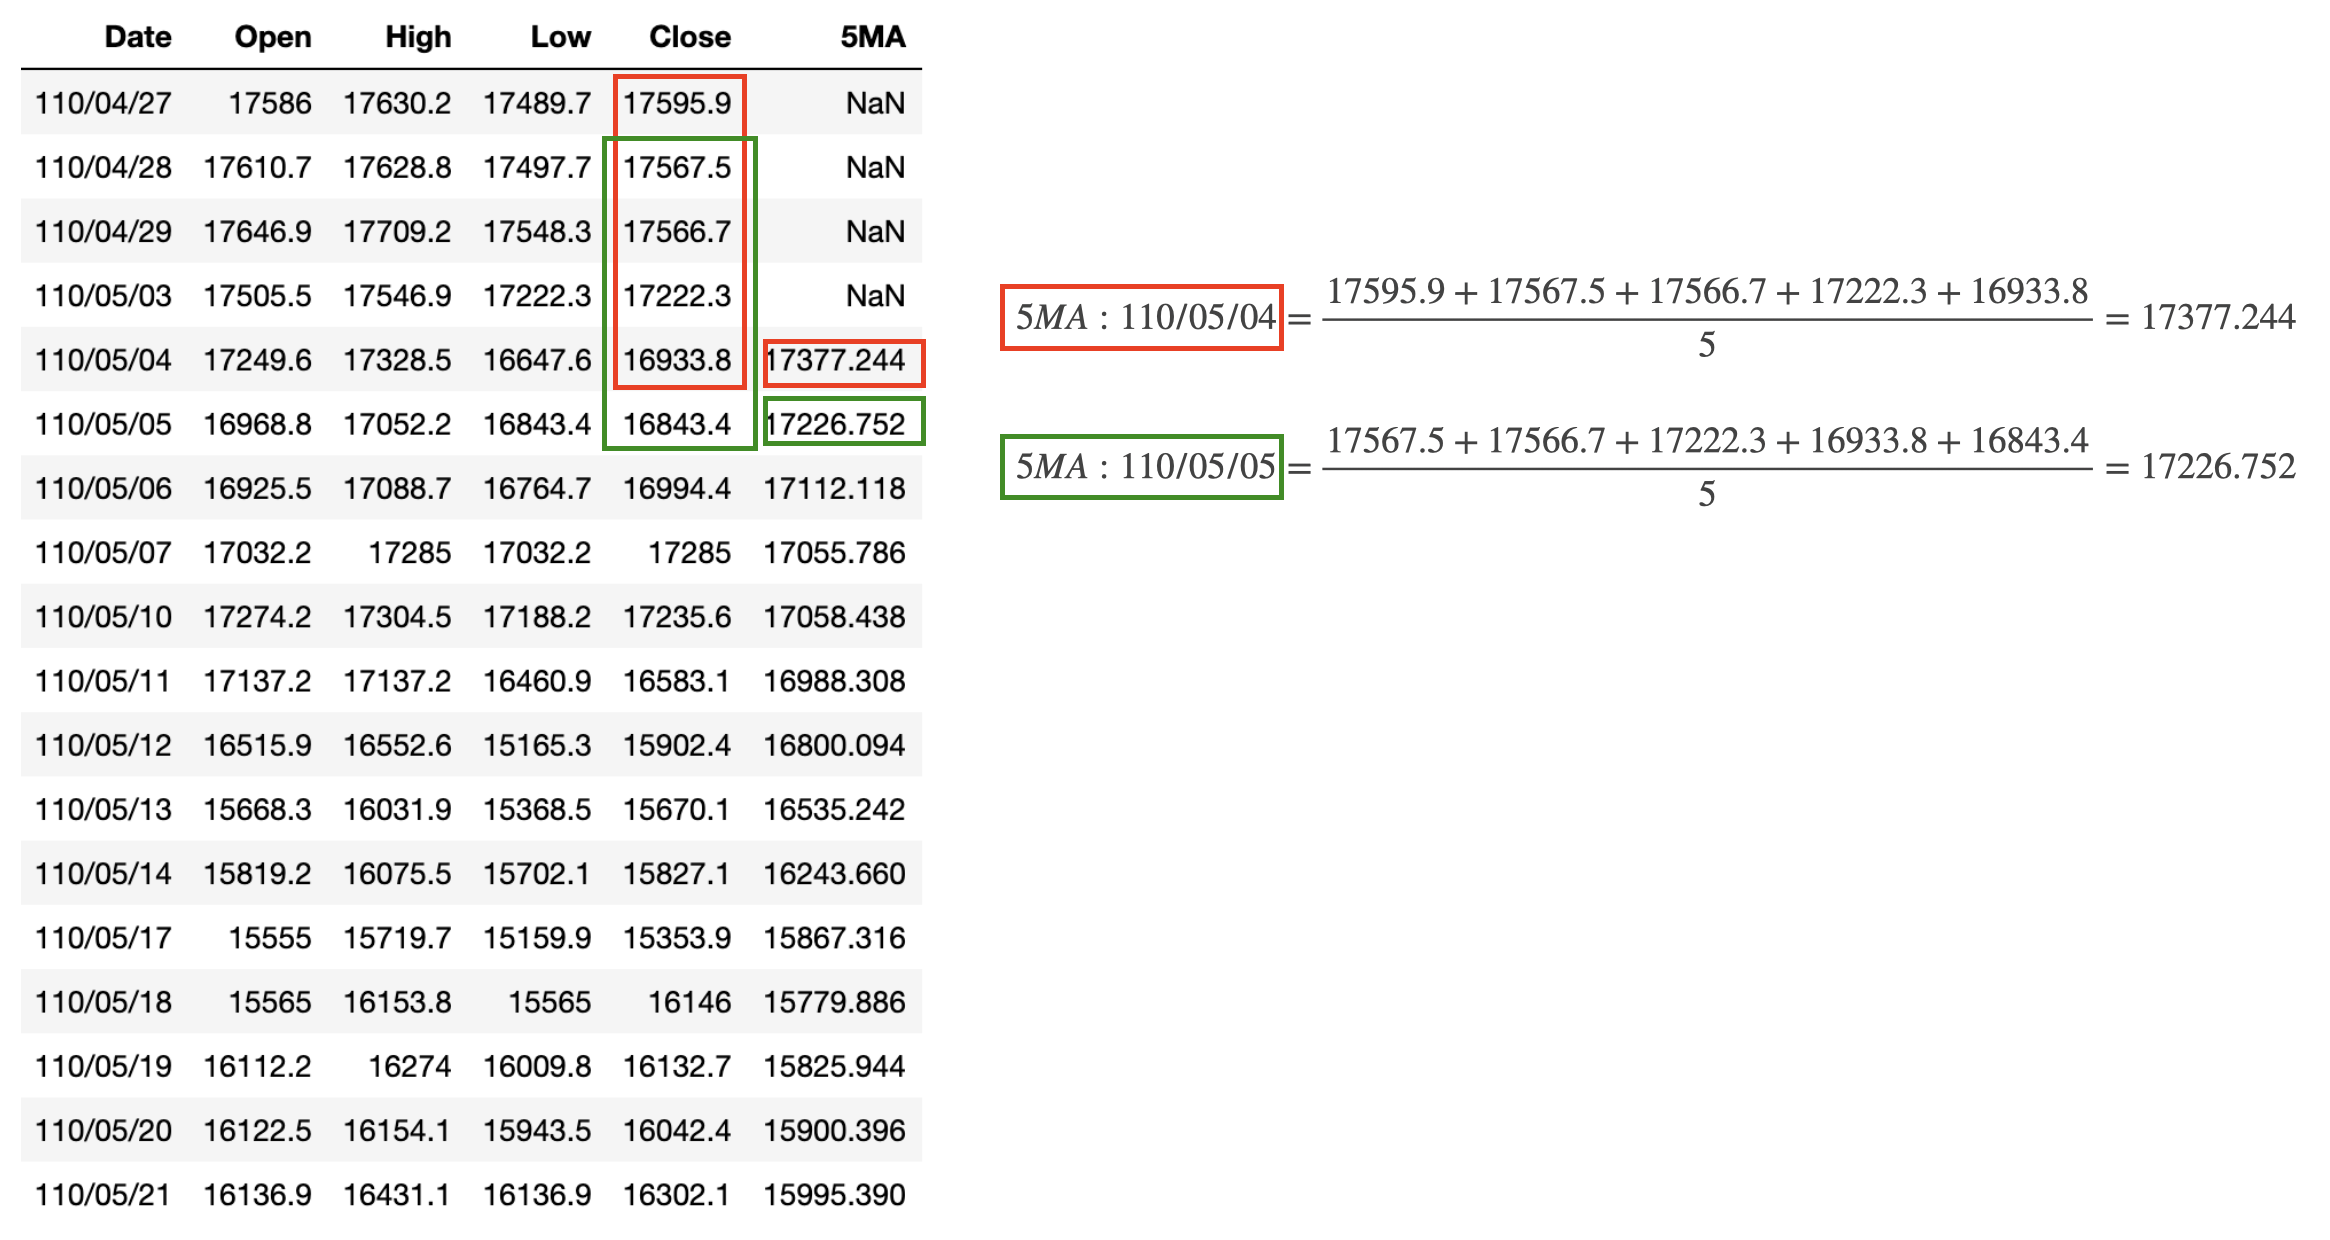

In [23]:
Image("img/MA_calculate.png")

## 1.2 指數移動平均 (Exponential Moving Average）
指數移動平均（EMA或EWMA）是以指數式遞減加權的移動平均。各數值的加權影響力隨時間而指數式遞減，越近期的數據加權影響力越重，但較舊的數據也給予一定的加權值。

參考資料: pandas.DataFrame.ewm https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html#pandas.DataFrame.ewm

# Part2: 計算與視覺化移動平均線

## 2.1 大盤移動平均線

### Import 套件

In [4]:
import requests as r
import json
import numpy as np
import pandas as pd
from datetime import datetime, date

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
#!pip install plotly

### 下載多日大盤走勢資料
資料來源：證交所 發行量加權股價指數歷史資料
https://www.twse.com.tw/zh/page/trading/indices/MI_5MINS_HIST.html

In [5]:
def get_stock_market_data(start_year, start_month, end_year, end_month):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/indicesReport/MI_5MINS_HIST?response=json&date=" + month
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '開盤價', '最高價', '最低價', '收盤價']
    return df

In [6]:
stock = get_stock_market_data(start_year = 2020, start_month = 1, end_year = 2021, end_month = 5)
stock.head(10)

,日期,開盤價,最高價,最低價,收盤價
0,109/01/02,"12,026.50","12,110.74","12,026.23","12,100.48"
1,109/01/03,"12,167.44","12,197.64","12,023.60","12,110.43"
2,109/01/06,"12,035.71","12,040.08","11,953.36","11,953.36"
3,109/01/07,"11,961.97","11,986.03","11,822.40","11,880.32"
4,109/01/08,"11,818.76","11,899.67","11,777.45","11,817.10"
5,109/01/09,"11,889.46","11,992.55","11,889.46","11,970.63"
6,109/01/10,"12,009.27","12,038.21","11,959.06","12,024.65"
7,109/01/13,"12,069.61","12,113.42","12,037.24","12,113.42"
8,109/01/14,"12,161.73","12,186.62","12,140.27","12,179.81"
9,109/01/15,"12,169.92","12,169.92","12,048.01","12,091.88"


### 把"開盤價", "最高價", "最低價", "收盤價"帶有逗號的字串(string)換成浮點數(float)

In [7]:
for col in range(1, 5):
    for row in range(stock.shape[0]):
        stock.iloc[row, col] = float(stock.iloc[row,col].replace(',', ''))
        
stock.head(10)

,日期,開盤價,最高價,最低價,收盤價
0,109/01/02,12026.5,12110.7,12026.2,12100.5
1,109/01/03,12167.4,12197.6,12023.6,12110.4
2,109/01/06,12035.7,12040.1,11953.4,11953.4
3,109/01/07,11962,11986,11822.4,11880.3
4,109/01/08,11818.8,11899.7,11777.5,11817.1
5,109/01/09,11889.5,11992.5,11889.5,11970.6
6,109/01/10,12009.3,12038.2,11959.1,12024.6
7,109/01/13,12069.6,12113.4,12037.2,12113.4
8,109/01/14,12161.7,12186.6,12140.3,12179.8
9,109/01/15,12169.9,12169.9,12048,12091.9


### 把日期從字串(string)換成時間(datetime)，並將民國年換成西元年

In [8]:
for row in range(stock.shape[0]):
    date2 = stock.iloc[row,0].split('/')
    stock.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
stock.head(10)

,日期,開盤價,最高價,最低價,收盤價
0,2020-01-02 00:00:00,12026.5,12110.7,12026.2,12100.5
1,2020-01-03 00:00:00,12167.4,12197.6,12023.6,12110.4
2,2020-01-06 00:00:00,12035.7,12040.1,11953.4,11953.4
3,2020-01-07 00:00:00,11962,11986,11822.4,11880.3
4,2020-01-08 00:00:00,11818.8,11899.7,11777.5,11817.1
5,2020-01-09 00:00:00,11889.5,11992.5,11889.5,11970.6
6,2020-01-10 00:00:00,12009.3,12038.2,11959.1,12024.6
7,2020-01-13 00:00:00,12069.6,12113.4,12037.2,12113.4
8,2020-01-14 00:00:00,12161.7,12186.6,12140.3,12179.8
9,2020-01-15 00:00:00,12169.9,12169.9,12048,12091.9


### 計算 5, 10, 20, 60, 120, 240日均線
參考資料：pandas.DataFrame.rolling https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [10]:
stock['5MA'] = stock['收盤價'].rolling(window = 5).mean()
stock['10MA'] = stock['收盤價'].rolling(window = 10).mean()
stock['20MA'] = stock['收盤價'].rolling(window = 20).mean()
stock['60MA'] = stock['收盤價'].rolling(window = 60).mean()
stock['120MA'] = stock['收盤價'].rolling(window = 120).mean()
stock['240MA'] = stock['收盤價'].rolling(window = 240).mean()

In [11]:
stock.head(20)

,日期,開盤價,最高價,最低價,收盤價,5MA,10MA,20MA,60MA,120MA,240MA
0,2020-01-02 00:00:00,12026.5,12110.7,12026.2,12100.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03 00:00:00,12167.4,12197.6,12023.6,12110.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 00:00:00,12035.7,12040.1,11953.4,11953.4,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-07 00:00:00,11962,11986,11822.4,11880.3,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 00:00:00,11818.8,11899.7,11777.5,11817.1,11972.338,NaN,NaN,NaN,NaN,NaN
5,2020-01-09 00:00:00,11889.5,11992.5,11889.5,11970.6,11946.368,NaN,NaN,NaN,NaN,NaN
6,2020-01-10 00:00:00,12009.3,12038.2,11959.1,12024.6,11929.212,NaN,NaN,NaN,NaN,NaN
7,2020-01-13 00:00:00,12069.6,12113.4,12037.2,12113.4,11961.224,NaN,NaN,NaN,NaN,NaN
8,2020-01-14 00:00:00,12161.7,12186.6,12140.3,12179.8,12021.122,NaN,NaN,NaN,NaN,NaN
9,2020-01-15 00:00:00,12169.9,12169.9,12048,12091.9,12076.078,12024.208,NaN,NaN,NaN,NaN


### 畫加權指數移動平均圖

In [23]:
df = stock

# plot moving average
fig = go.Figure(data=[
                      go.Scatter(x = df['日期'], y = df['收盤價'], name = '收盤價'),                  
                      go.Scatter(x = df['日期'], y = df['5MA'], name = '5 MA'),
                      go.Scatter(x = df['日期'], y = df['20MA'], name = '20 MA'),
                      go.Scatter(x = df['日期'], y = df['60MA'], name = '60 MA'),
                      go.Scatter(x = df['日期'], y = df['120MA'], name = '120 MA'),
                      go.Scatter(x = df['日期'], y = df['240MA'], name = '240 MA'),
                     ])

# Add figure title
fig.update_layout(
    title_text="加權指數移動平均"
)

# Set x-axis title
fig.update_xaxes(title_text="日期")

# Set y-axis title
fig.update_yaxes(title_text="指數")

fig.show()

### 畫加權指數K線與移動平均圖

In [13]:
df = stock

# plot the candlesticks
fig = go.Figure(data=[go.Candlestick(x = df['日期'],
                                     open = df['開盤價'], 
                                     high = df['最高價'],
                                     low = df['最低價'],
                                     close = df['收盤價'], 
                                     increasing_line_color= 'red', 
                                     decreasing_line_color= 'green',
                                     name='Candle Stick'), 
                      go.Scatter(x = df['日期'], y = df['5MA'], name = '5 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['20MA'], name = '20 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['60MA'], name = '60 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['120MA'], name = '120 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['240MA'], name = '240 MA', line = dict(width=1)),
                     ])

# Add figure title
fig.update_layout(
    title_text="加權指數K線與移動平均"
)

# Set x-axis title
fig.update_xaxes(title_text="日期")

# Set y-axis title
fig.update_yaxes(title_text="指數")


fig.show()

## 2.2 個股移動平均線

### 下載多日個股走勢資料
資料來源：證交所 個股日成交資訊
https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html

In [14]:
def get_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [15]:
tsmc = get_stock_data(start_year = 2020, start_month = 1, end_year = 2021, end_month = 5, stock_code = 2330)
tsmc.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,109/01/02,"33,282,120","11,224,165,450",332.50,339.00,332.50,339.00,+8.00,"17,160"
1,109/01/03,"42,023,268","14,295,651,580",344.00,345.00,335.50,339.50,+0.50,"20,545"
2,109/01/06,"45,677,057","15,210,531,318",333.00,334.50,332.00,332.00,-7.50,"22,944"
3,109/01/07,"51,746,181","17,053,282,011",332.50,333.00,326.50,329.50,-2.50,"22,362"
4,109/01/08,"37,913,748","12,484,410,088",325.00,333.00,325.00,329.50,0.00,"18,228"


### 把"成交股數" "成交金額" "開盤價", "最高價", "最低價", "收盤價" "漲跌價差" "成交筆數"帶有逗號的字串(string)換成浮點數(float)

In [16]:
for col in [1, 2, 3, 4, 5, 6, 8]:
    for row in range(tsmc.shape[0]):
        tsmc.iloc[row, col] = float(tsmc.iloc[row,col].replace(',', ''))
        
tsmc.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,109/01/02,3.32821e+07,1.12242e+10,332.5,339,332.5,339,+8.00,17160
1,109/01/03,4.20233e+07,1.42957e+10,344,345,335.5,339.5,+0.50,20545
2,109/01/06,4.56771e+07,1.52105e+10,333,334.5,332,332,-7.50,22944
3,109/01/07,5.17462e+07,1.70533e+10,332.5,333,326.5,329.5,-2.50,22362
4,109/01/08,3.79137e+07,1.24844e+10,325,333,325,329.5,0.00,18228
5,109/01/09,3.23975e+07,1.08908e+10,335,337.5,333.5,337.5,+8.00,16793
6,109/01/10,2.78801e+07,9.43232e+09,340.5,341,336,339.5,+2.00,13296
7,109/01/13,3.06633e+07,1.04559e+10,342,342,339,341.5,+2.00,13457
8,109/01/14,3.0369e+07,1.04884e+10,345.5,346,344.5,346,+4.50,16339
9,109/01/15,5.45753e+07,1.85908e+10,345,345,337.5,340,-6.00,20392


### 把日期從字串(string)換成時間(datetime)，並將民國年換成西元年

In [17]:
for row in range(tsmc.shape[0]):
    date2 = tsmc.iloc[row,0].split('/')
    tsmc.iloc[row, 0] = datetime(int(date2[0]) + 1911, int(date2[1]), int(date2[2]))
        
tsmc.head(10)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2020-01-02 00:00:00,3.32821e+07,1.12242e+10,332.5,339,332.5,339,+8.00,17160
1,2020-01-03 00:00:00,4.20233e+07,1.42957e+10,344,345,335.5,339.5,+0.50,20545
2,2020-01-06 00:00:00,4.56771e+07,1.52105e+10,333,334.5,332,332,-7.50,22944
3,2020-01-07 00:00:00,5.17462e+07,1.70533e+10,332.5,333,326.5,329.5,-2.50,22362
4,2020-01-08 00:00:00,3.79137e+07,1.24844e+10,325,333,325,329.5,0.00,18228
5,2020-01-09 00:00:00,3.23975e+07,1.08908e+10,335,337.5,333.5,337.5,+8.00,16793
6,2020-01-10 00:00:00,2.78801e+07,9.43232e+09,340.5,341,336,339.5,+2.00,13296
7,2020-01-13 00:00:00,3.06633e+07,1.04559e+10,342,342,339,341.5,+2.00,13457
8,2020-01-14 00:00:00,3.0369e+07,1.04884e+10,345.5,346,344.5,346,+4.50,16339
9,2020-01-15 00:00:00,5.45753e+07,1.85908e+10,345,345,337.5,340,-6.00,20392


### 計算 5, 10, 20, 60, 120, 240日均線
參考資料：pandas.DataFrame.rolling https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [18]:
tsmc['5MA'] = tsmc['收盤價'].rolling(window = 5).mean()
tsmc['10MA'] = tsmc['收盤價'].rolling(window = 10).mean()
tsmc['20MA'] = tsmc['收盤價'].rolling(window = 20).mean()
tsmc['60MA'] = tsmc['收盤價'].rolling(window = 60).mean()
tsmc['120MA'] = tsmc['收盤價'].rolling(window = 120).mean()
tsmc['240MA'] = tsmc['收盤價'].rolling(window = 240).mean()

In [20]:
tsmc.head(20)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,5MA,10MA,20MA,60MA,120MA,240MA
0,2020-01-02 00:00:00,3.32821e+07,1.12242e+10,332.5,339,332.5,339,+8.00,17160,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03 00:00:00,4.20233e+07,1.42957e+10,344,345,335.5,339.5,+0.50,20545,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 00:00:00,4.56771e+07,1.52105e+10,333,334.5,332,332,-7.50,22944,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-07 00:00:00,5.17462e+07,1.70533e+10,332.5,333,326.5,329.5,-2.50,22362,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 00:00:00,3.79137e+07,1.24844e+10,325,333,325,329.5,0.00,18228,333.9,NaN,NaN,NaN,NaN,NaN
5,2020-01-09 00:00:00,3.23975e+07,1.08908e+10,335,337.5,333.5,337.5,+8.00,16793,333.6,NaN,NaN,NaN,NaN,NaN
6,2020-01-10 00:00:00,2.78801e+07,9.43232e+09,340.5,341,336,339.5,+2.00,13296,333.6,NaN,NaN,NaN,NaN,NaN
7,2020-01-13 00:00:00,3.06633e+07,1.04559e+10,342,342,339,341.5,+2.00,13457,335.5,NaN,NaN,NaN,NaN,NaN
8,2020-01-14 00:00:00,3.0369e+07,1.04884e+10,345.5,346,344.5,346,+4.50,16339,338.8,NaN,NaN,NaN,NaN,NaN
9,2020-01-15 00:00:00,5.45753e+07,1.85908e+10,345,345,337.5,340,-6.00,20392,340.9,337.40,NaN,NaN,NaN,NaN


### 畫個股移動平均圖

In [21]:
df = tsmc

# plot moving average
fig = go.Figure(data=[
                      go.Scatter(x = df['日期'], y = df['收盤價'], name = '收盤價'),                  
                      go.Scatter(x = df['日期'], y = df['5MA'], name = '5 MA'),
                      go.Scatter(x = df['日期'], y = df['20MA'], name = '20 MA'),
                      go.Scatter(x = df['日期'], y = df['60MA'], name = '60 MA'),
                      go.Scatter(x = df['日期'], y = df['120MA'], name = '120 MA'),
                      go.Scatter(x = df['日期'], y = df['240MA'], name = '240 MA'),
                     ])

# Add figure title
fig.update_layout(
    title_text="台積電(2330) 移動平均"
)

# Set x-axis title
fig.update_xaxes(title_text="日期")

# Set y-axis title
fig.update_yaxes(title_text="指數")

fig.show()

### 畫個股K線與移動平均圖

In [25]:
df = tsmc

# plot the candlesticks
fig = go.Figure(data=[go.Candlestick(x = df['日期'],
                                     open = df['開盤價'], 
                                     high = df['最高價'],
                                     low = df['最低價'],
                                     close = df['收盤價'], 
                                     increasing_line_color= 'red', 
                                     decreasing_line_color= 'green',
                                     name='Candle Stick'), 
                      go.Scatter(x = df['日期'], y = df['收盤價'], name = '收盤價', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['5MA'], name = '5 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['20MA'], name = '20 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['60MA'], name = '60 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['120MA'], name = '120 MA', line = dict(width=1)),
                      go.Scatter(x = df['日期'], y = df['240MA'], name = '240 MA', line = dict(width=1))
                     ])

# Add figure title
fig.update_layout(
    title_text="台積電(2330) K線與移動平均"
)

# Set x-axis title
fig.update_xaxes(title_text="日期")

# Set y-axis title
fig.update_yaxes(title_text="指數")


fig.show()

# Part 3: 移動平均應用

## 3.1 黃金交叉
當短期均線由下往上穿越長期均線，常為多頭訊號

## 3.2 死亡交叉
當短期均線由上往下穿越長期均線，常為空頭訊號

### 計算大盤黃金交叉與死亡交叉

In [26]:
stock.head(20)

,日期,開盤價,最高價,最低價,收盤價,5MA,10MA,20MA,60MA,120MA,240MA
0,2020-01-02 00:00:00,12026.5,12110.7,12026.2,12100.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03 00:00:00,12167.4,12197.6,12023.6,12110.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 00:00:00,12035.7,12040.1,11953.4,11953.4,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-07 00:00:00,11962,11986,11822.4,11880.3,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-08 00:00:00,11818.8,11899.7,11777.5,11817.1,11972.338,NaN,NaN,NaN,NaN,NaN
5,2020-01-09 00:00:00,11889.5,11992.5,11889.5,11970.6,11946.368,NaN,NaN,NaN,NaN,NaN
6,2020-01-10 00:00:00,12009.3,12038.2,11959.1,12024.6,11929.212,NaN,NaN,NaN,NaN,NaN
7,2020-01-13 00:00:00,12069.6,12113.4,12037.2,12113.4,11961.224,NaN,NaN,NaN,NaN,NaN
8,2020-01-14 00:00:00,12161.7,12186.6,12140.3,12179.8,12021.122,NaN,NaN,NaN,NaN,NaN
9,2020-01-15 00:00:00,12169.9,12169.9,12048,12091.9,12076.078,12024.208,NaN,NaN,NaN,NaN


In [27]:
# 去除NaN值
stock_without_nan = stock[239:]
stock_without_nan = stock_without_nan.reset_index(drop=True)
stock_without_nan.head()

,日期,開盤價,最高價,最低價,收盤價,5MA,10MA,20MA,60MA,120MA,240MA
0,2020-12-24 00:00:00,14256.3,14324.4,14256.3,14280.3,14263.150,14242.040,14162.5675,13424.213667,13006.656000,12023.243000
1,2020-12-25 00:00:00,14307,14400.8,14297,14331.4,14279.442,14249.013,14185.7840,13455.275167,13025.309750,12032.538583
2,2020-12-28 00:00:00,14363.5,14483.1,14363.5,14483.1,14299.064,14276.215,14223.7930,13488.066167,13044.583750,12042.424583
3,2020-12-29 00:00:00,14500.9,14547.1,14435,14472,14357.982,14316.568,14253.1120,13520.129000,13063.578417,12052.919125
4,2020-12-30 00:00:00,14486,14695.4,14476.7,14687.7,14450.904,14354.892,14288.0400,13553.186833,13085.361917,12064.616542


In [28]:
stock_without_nan['positions'] = np.where(stock_without_nan['5MA'] > stock_without_nan['10MA'], 1, -1)

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = stock_without_nan

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x = df['日期'], y= df['收盤價'], name = "收盤價", line = dict(color="grey")),
    secondary_y = False,
)

fig.add_trace(
    go.Scatter(x = df['日期'], y= df['5MA'], name = "5MA", line = dict(width=1, color="red")),
    secondary_y = False,
)


fig.add_trace(
    go.Scatter(x = df['日期'], y= df['10MA'], name = "10MA", line = dict(width=1, color="purple")),
    secondary_y = False,
)


fig.add_trace(
    go.Scatter(x = df['日期'], y = df['positions'], name = "趨勢", line = dict(color="black", width = 1, dash='dashdot')),
    secondary_y = True,
)

fig.add_trace(
    go.Scatter(
        x=["2021-02-05", "2021-03-12", "2021-03-29", "2021-05-22"],
        y=[15640.016, 16003.922, 16215.802, 16090.532],
        mode="markers+text",
        name="黃金交叉",
        text=["黃金交叉", "黃金交叉", "黃金交叉", "黃金交叉"],
        textposition="bottom center"
    )
)

fig.add_trace(
    go.Scatter(
        x=["2021-01-28", "2021-03-01", "2021-03-23", "2021-05-04"],
        y=[15750.928, 16215.758, 16181.402, 17347.244],
        mode="markers+text",
        name="死亡交叉",
        text=["死亡交叉", "死亡交叉", "死亡交叉", "死亡交叉"],
        textposition="top left"
    )
)

# Add figure title
fig.update_layout(
    title_text="加權指數移動平均趨勢圖"
)

# Set x-axis title
fig.update_xaxes(title_text="日期")

# Set y-axes titles
fig.update_yaxes(title_text="<b>指數</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>趨勢</b>", secondary_y=True)

fig.show()